In [1]:
import ibmJupyterNotebookStyles
ibmJupyterNotebookStyles.apply_ibm_styles()

# Classical neural networks

In this section, we introduce classical neural networks. The goal of the artificial neural network (ANN) is to obtain a function $f_{w}(x)$ that approximates a target function $g(x)$, that is: 

$$f_{w}(x) \approx g(x),$$

where $x$ is the input data and $w$ corresponds to the set of parameters, or weights, of the ANN. The aim of the ANN is to find the best set of $w$ that approximates $g(x)$. This definition applies to both classification and regression problems.<sup>1</sup>   

We will start by introducing the simplest neural network architecture, namely, the perceptron. Then, deep neural networks are introduced. These more complex neural networks consist of multiple layers, where each layer is composed of multiple neurons. Deep neural network architectures cover a broader spectrum of algorithms and topologies, some of which have existed for more than 70 years. 

Next, we introduce how to train neural networks with backpropagation, followed by several activation functions. Finally, we explain several optimizers used for training neural networks, and we cover the universal approximation theorem.

## Perceptron

The perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. The perceptron is used for classification through supervised learning.<sup>2</sup> The perceptron consists of two steps: computing the weighted sum of its inputs and applying the threshold function. The perceptron is sometimes referred to as a single-layer linear threshold unit (LTU); see the figure below. 

<img src="figs/perceptron.png" alt="drawing" width="500"/><br>

As indicated in the figure, the perceptron takes an input vector $x$, then obtains the weighted sum of the inputs. This is mathmatically described by:

$$y=w^T \cdot x + b = \sum_{i=0}^N w_ix_i +b,$$

where $y$ is the single value output, $w^T$ is the transpose vector of the weights, and $x$ is the input vector. Hence, $w_0$ is the bias as $x_0=1$. Note, the bias may be indicated as $b$. For the second step, the activation function is applied (in this case, the step function), which yields:

$$y = f(z) = f\big(\sum_{i=0}^N w_ix_i +b\big),$$


such that,
<!-- s.t. $\sum_{i=0}^N w_ix_i +b \geq 1$, $\forall i:y = 1$,<br>
$\sum_{i=0}^N w_ix_i +b \leq -1$,$ \forall i:y = -1$.<br>
 -->

$$  
y = 
     \begin{cases}
       +1, &\quad \sum_{i=0}^N w_ix_i +b \geq 0\\
       -1, &\quad\text{else.}\\
     \end{cases}
$$

where $f(z)$ is a nonlinear activation function that outputs $1$ or $-1$. 

Several activation functions exist and will be discussed in a later section.

## Deep neural networks

Although perceptrons enjoyed their fair share of fame when they were discovered, they were quickly shown to be ineffective in learning even the simplest functions, for example, the XOR function. Subsequent research quickly established the necessity of multilayer perceptron architechures for learning nonlinear functions. This has resulted in a broad spectrum of algorithms and topologies for deep learning models. The following figure categorizes the most common architectures by type of learning: supervised or unsupervised learning. 

<img src="figs/NNarchitecteurs.png" alt="drawing" width="500"/>

Some of these architectures have existed for more than 70 years, but as a result of classical hardware improvements such as graphical processing units (GPUs), there is renewed interest in them. We will discuss specific architectures in the following sections. 


### Feedforward neural networks

The feedforward neural network is the simplest multilayer architecture. The following figure shows a feedforward neural network with one hidden layer:

<img src="figs/nnhidden.png" alt="drawing" width="500"/><br>

Similar to the perceptron, this neural network has inputs $x$, weights $w$, and a bias $b$. Additionally, it uses the output of one layer as an input for the following layer. This is mathematically expressed as:

$$y_j = f\big(\sum_{i=0}^N w_{ij}x_i +b_j\big),$$

where $j$ is an additional index for the output of a single unit $j$ of a layer. Here, $w_{ij}$ is the weight between the $j$-th layer unit and the $i$-th input. Note the above neural network represents a fully connected layer.<sup>1</sup> However, several types of layer architectures exist and will be discussed in the section “Various Architectures” below.

### Convolutional neural networks

Convolutional neural networks (CNN) are some of the best-known examples of deep neural networks. They have been successfully applied to tasks such as image recognition, image segmentation, and so on. They are used for their excellent performance with image, speech, or audio signal inputs. 

CNNs consist of three main types of layers: the convolutional layer, the pooling layer, and the fully connected layer. The first layer of a CNN is always the convolutional layer. The subsequent layers might be convolutional layers or pooling layers. However, the final layer must be the fully connected layer. The first layers focus on simple features, such as colors or edges when processing image data. Deeper into the CNN, larger elements or object shapes might be recognized until finally an object is identified. 

#### Convolutional layer 

The convolutional layer forms the basis of the CNN. This layer is where the majority of the computations occur. It consists of three components: input data, a filter, and a feature map. For instance, a color image can be an input having three dimensions: height, width, and depth. There’s also the filter, which can be referred to as a feature detector or kernel. The feature detector moves across receptive fields of the image while checking if the feature is present. Mathematically, this is done by taking the dot product of the input and the filter, that is, a feature map. For more information, refer to [Convolutional Neural Networks](https://www.ibm.com/cloud/learn/convolutional-neural-networks). 

<img src="figs/CNNLayers.png" alt="drawing" width="500"/><br>

#### Pooling layer

The pooling layer performs dimensionality reductions. That is, it reduces the amount of input parameters. Similar to the convolutional layer, the pooling layer moves across receptive fields of the image. The advantages of the pooling layer are the reduction of complexity, improved efficiency, and lowered risk of overfitting. See [Convolutional Neural Networks](https://www.ibm.com/cloud/learn/convolutional-neural-networks) for more details. 

#### Fully connected layer

As the name suggests, this layer fully connects each node in the output layer directly to a node in the previous layer. The fully connected layer is responsible for the classification of the image based on extracted features. See [Convolutional Neural Networks](https://www.ibm.com/cloud/learn/convolutional-neural-networks) for more information.


### Recurrent neural networks

The recurrent neural network (RNN) is a foundational architecture for other deep learning architectures. The RNN distinguishes itself from feedforward neural networks in that it has connections that feed back either into prior layers or into the same layer. In other words, feedforward neural networks assume that inputs and outputs are independent from each other, whereas the output of RNNs depends on the prior element within the sequence ([Recurrent Neural Networks](https://www.ibm.com/cloud/learn/recurrent-neural-networks)). This allows the RNN architecture to remember past inputs and model problems in time.<sup>3</sup> The RNN primarily uses sequential data or time series. 

The following figure shows the difference between feedforward neural networks and RNNs schematically. 

<img src="figs/RNN_NN.png" alt="drawing" width="500"/><br>

The figure indicates that each input of the RNN maps to an output. However, this is not necessarily the case. Instead, RNN inputs and outputs vary in length. 

Another characteristic that distinguishes RNNs from feedforward neural networks is the sharing of weights within each layer of the network. You can learn more about RNNs from [Recurrent Neural Networks](https://www.ibm.com/cloud/learn/recurrent-neural-networks). 


### Long short-term memory

Long short-term memory (LSTM) is one of the most popular RNN architectures. It is an example of a neural network that builds on the RNN architecture. 

As explained previously, RNNs remember past inputs. However, the feedback loops responsible for the memory in RNNs work only on temporally close events. The RNN runs into problems with large, distant temporal events. To solve this problem, memory cells are added to the neurons, resulting in a LSTM network.<sup>4</sup> The introduction of memory cells allows us to address problems with long-term dependencies. 

<img src="figs/LSTM.png" alt="drawing" width="300"/><br>

LSTM memory cells consist of three gates that control information flows into or out of the cell. The input gate determines when new information is allowed to flow into the memory. The forget gate controls when an existing piece of information is forgotten, which allows the cell to remember new data. Finally, the output gate controls whether the information that is contained in the cell is used as output from the cell. Additionally, the memory cell contains weights that control each gate. The training algorithm that optimizes the weights is backpropagation through time (BPTT), which is based on the resulting network output error.<sup>3</sup> 

<img src="figs/LSTM_Memory_cell.png" alt="drawing" width="300"/><br>

Although LSTM is a powerful neural network, it has a downside as well. It requires a lot of data and computing power to perform well. 

## Training a neural network

Training a neural network aims to minimize the cost function $J(w_{ij})$ by finding the optimal set of weights $w_{ij}$. The $J(w_{ij})$ is a measure of the performance of the neural network. Typically, this is the difference between the output of the neural network and the assigned label. 

The cost function mean squared error (MSE) is given by:

$$J(w) = \frac{1}{2n} \sum_{i=1}^n (f_{w}(x^i) - t^i)^2,$$

where $f_{w}(x^i)$ is the output, $n$ is the total number of samples in the training set, $x^i$ are input vectors to the training samples, $i$ denotes the $i$-th sample of the training set, and $t^i$ is the associated label for $x^i$.

### Gradient descent

The goal of the training is to reach the global minimum of the cost function. One approach for reaching the global minimum is using the gradient descent algorithm. Although this algorithm has the potential to find a global minimum, this is not guaranteed. The gradient descent algorithm computes the derivative of the cost function $J(w)$ with respect to the weights $w$. The result of the derivative is then used to update the weights. This process is formalized by:

1. Initialize network weights $w$ with random values.

2. Compute the derivative of the cost function $J(w)$ with respect to $w$:
$$\frac{\partial J(w)}{\partial  w_j} = \frac{1}{2n}\sum_{i=1}^n \frac{\partial (f_{w}(x^i) - t^i)^2}{\partial w_j} = \frac{1}{n}\sum_{i=1}^n \frac{\partial f_{w}(x^i)}{\partial w_j} (f_{w}(x^i) - t^i).$$

3. Update the weights $w$ by using the derivatives from step 2:
$$w_j \mapsto w_j - \eta \frac{\partial J(w)}{\partial w_j},$$
where $\eta$ is the learning rate. 

### Backpropagation

Backpropagation was introduced in the 1970s, but it wasn’t until 1980 that its potential was realized. More then 30 years after its invention, the algorithm became a key approach for training neural networks because it is fast and efficient. As the names suggests, the algorithm backward-propagates errors within a neural network.<sup>2</sup> In general, backpropagation is given by:

$$\frac{\partial J(\theta)}{\partial \theta_{i}} = \frac{\partial J(f(\theta))}{\partial \theta_i} = \frac{\partial J(f(\theta))}{\partial f(\theta)}\frac{\partial f(\theta)}{\partial \theta_i}, $$ 

where $J(\theta)$ is the cost function, $\theta$ are the weights and $f(\theta)$ is the network output. 

The following steps mathematically introduce backpropagation for a feedforward multilayer neural network. We define $w_{ij}$ as the weight between the $i$-th neuron of layer $l$ and the $j$-th neuron of layer $l$+1. This is schematically represented in the following figure: 

<img src="figs/back-propagation.png" alt="drawing" width="500"/><br>

In the previous figure, the second-to-last layer outputs $y^{(l)}_{i}$, the last layer outputs $y^{(l+1)}_{j}$ and the weighted sum of the outputs of the second-to-last layer $a^{l+1}_j$.


1. The derivative of the cost function $J$ with respect to the weight $w_{i,j}$ is:

$$\frac{\partial J(w)}{\partial w_{i,j}} = \frac{\partial J(w)}{\partial y^{l+1}_{j}} \frac{\partial y^{l+1}_{j}}{\partial a^{l+1}_{j}}\frac{\partial a^{l+1}_{j}}{\partial w_{i,j}}. $$ 

2. The expression $\frac{\partial a^{l+1}_{j}}{\partial w_{i,j}}$ is rewritten.  $a^{l+1}_{j}$ is the weighted sum of the second-to-last output layer, that is: $a^{l+1}_{j} = y_i^lw_{ij}$. Substituting this identity for $a^{l+1}_{j}$ into the partial derivative results in:

$$\frac{\partial a^{l+1}_{j}}{\partial w_{i,j}} = \frac{\partial (y_i^lw_{ij})}{\partial w_{i,j}} = y^l_i.$$


3. We look at the first part of the equation in step 1, namely $\frac{\partial J}{\partial y^{l+1}_{j}} \frac{\partial y^{l+1}_{j}}{\partial a^{l+1}_{i}}$. This partial derivative represents the change in cost with respect to the activation value. In other words, this is the error at the neuron $y^{l+1}$. To indicate this interpretation, we set:  

$$\frac{\partial J}{\partial y^{l+1}_{j}} \frac{\partial y^{l+1}_{j}}{\partial a^{l+1}_{i}} = \delta^{l+1}_j .$$


4. Substitute the equations from steps 2 and 3 into the equation in step 1:

$$\frac{\partial J}{\partial w_{ij}} = \delta_j^{l+1} \frac{\partial a^{l+1}_j}{\partial w_{ij}} = \delta_j^{l+1} y_i^l$$

5. The updated rule for the weights of each layer are:

$$ w_{ij} \rightarrow w_{ij}-\eta \delta^{(l+1)}_j y^{l}_i$$ 


Note: In this section, we have defined the cost function as the MSE. However, other cost functions exist, such as mean absolute error, Huber loss, or cross-entropy. To learn about other cost functions, refer to the section titled “Cost Functions” in Vasilev 2019.<sup>1</sup>


## Activation functions

Several activation functions exist for neural networks. In this section, we discuss the sigmoid, hyperbolic tangent, and the rectified linear unit (ReLU) function. 

### Sigmoid

The sigmoid function can be interpreted stochastically as the probability of activating the neuron. It takes any real value as input and outputs values in the range (0, 1). The sigmoid function is defined as: 

$$f_{\text{sigmoid}}(x) = \frac{1}{1+e^{-x}},$$

where $x$ is the input value. The following code gives us a figure showing the sigmoid function and its derivative for $x \in \{-10, 10\}$.<sup>1</sup>

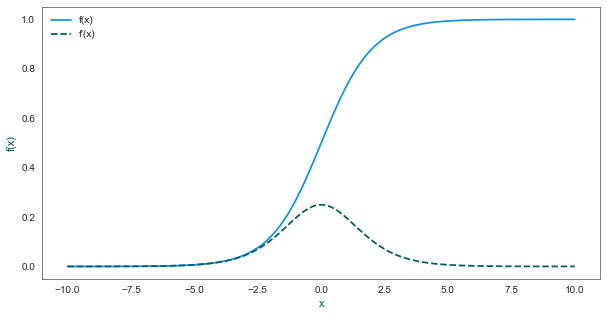

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

x = symbols('x')
f = 1.0/(1.0+exp(-x))
f_diff = diff(f,x)
f1 = lambdify(x,f)
f1_diff = lambdify(x,f_diff)
x1 = np.linspace(-10,10,100)
y1 = f1(x1)
y2 = f1_diff(x1)

plt.figure(figsize=(10,5))
plt.plot(x1,y1, color="#1192E8",label="f(x)")
plt.plot(x1,y2, color="#005D5D", linestyle= '--',label="f'(x)")
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Hyperbolic tangent 
Another activation function is the hyperbolic tangent. It is defined as:

$$f(x) = \text{tanh}(x).$$

As can be seen from the figure generated by the following code, this function has the same S-shape as the sigmoid function.<sup>1</sup> However, the output is in the range $(-1, 1)$.

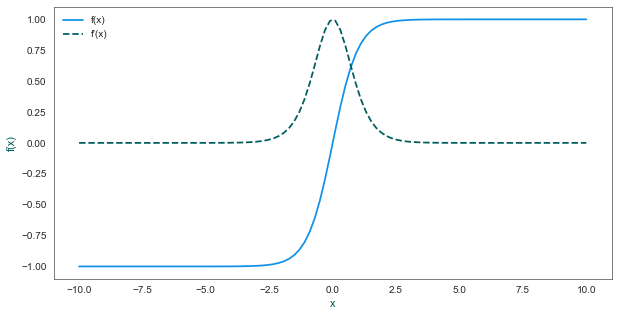

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

x = symbols('x')
f = tanh(x)
f_diff = diff(f,x)
f1 = lambdify(x,f)
f1_diff = lambdify(x,f_diff)
x1 = np.linspace(-10,10,100)
y1 = f1(x1)
y2 = f1_diff(x1)

plt.figure(figsize=(10,5))
plt.plot(x1,y1, color="#1192E8",label="f(x)")
plt.plot(x1,y2, color="#005D5D", linestyle= '--',label="f'(x)")
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Rectified linear unit (ReLU)
The ReLU is a newer introduction. It is given by:
$$ f(x)= \left \{\begin{array}{ll}
      x & x \geq 0 \\
      0 & x < 0  \\
      \end{array} 
\right..  $$

The ReLU activation function has several advantages over the others. First, its derivative prevents vanishing gradients. Second, it is idempotent, which means that $f(f(x)) = x$. These advantages result in a faster convergence than the sigmoid functions.<sup>1</sup> 

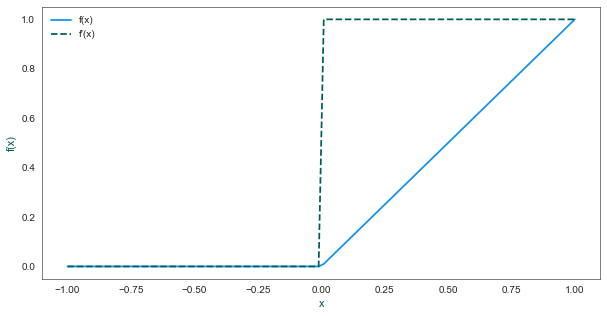

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy import Piecewise

x = symbols('x')
f = Piecewise((0,x<0),(x,x>=0))  #tanh(x)
f_diff = diff(f,x)
f1 = lambdify(x,f)
f1_diff = lambdify(x,f_diff)
x1 = np.linspace(-1,1,100)
y1 = f1(x1)
y2 = f1_diff(x1)

plt.figure(figsize=(10,5))
plt.plot(x1,y1, color="#1192E8",label="f(x)")
plt.plot(x1,y2, color="#005D5D", linestyle= '--',label="f'(x)")
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Optimizers

The choice of the optimizer for training a machine learning model can be crucial in determining the success of our training’s outcome. When using `PyTorch` (directly or through `TorchConnector` from Qiskit), you get access to all of the optimizer algorithms defined in the `torch.optim` package. 

Some of the most common algorithms used in popular machine learning architectures include first-order methods like Adam and Adagrad, stochastic methods like SGD, and second-order methods like L-BFGS. We will review these four optimizers in more detail in this section. For methods not described here, we recommend consulting the appropriate framework documentation, such as `PyTorch` or Kochenderfer and Wheeler 2019.<sup>5</sup>

### Stochastic gradient descent

Stochastic gradient descent (SGD), in contrast to simple gradient descent, uses only one randomly selected sample for each iteration. The ability to select one training sample instead of updating the parameters for the entire training data set is a significant advantage when working with large data sets. The SGD is given by:

$$w \mapsto w - \eta \frac{\delta J(w;x_i;y_i)}{\delta w}$$

where $x_i$ is the $i$-th element training data and $y_i$ the $i$-th outcome. Holding one set of training results is easier for storage. Additionally, SGD converges faster than gradient descent to the global minimum. Refer to the [gradient descent documentation](https://www.ibm.com/cloud/learn/gradient-descent) for more information.

### Adaptive moment estimation method

The adaptive moment estimation (Adam) method adapts learning rates to each parameter. It stores both an exponentially decaying squared gradient and an exponentially decaying gradient.

Suppose we want to minimize $f(x)$. We denote $\boldsymbol{g}^{(k)}=\nabla{f(\boldsymbol{x}^{(k)})}$, where $\boldsymbol{x}^{(k)}$ is a point at descent iteration $k$. Then each iteration of Adam is:<br>
&emsp; biased decaying momentum: $\boldsymbol{v}^{(k+1)}=\gamma_{v}\boldsymbol{v}^{(k)}+(1-\gamma_{v})\boldsymbol{g}^{(k)}$<br>
&emsp; biased decaying square gradient: $\boldsymbol{s}^{(k+1)}=\gamma_{s}\boldsymbol{s}^{(k)}+(1-\gamma_{s})(\boldsymbol{g}^{(k)}\odot\boldsymbol{g}^{(k)})$<br>
&emsp; corrected decaying momentum: $\hat{\boldsymbol{v}}^{(k+1)}=\boldsymbol{v}^{(k+1)}/(1-\gamma^{k}_{v})$<br>
&emsp; corrected decaying square gradient: $\hat{\boldsymbol{s}}^{(k+1)}=\boldsymbol{s}^{(k+1)}/(1-\gamma^{k}_{s})$<br>
&emsp; next iteration: $\boldsymbol{x}^{(k+1)}=\boldsymbol{x}^{(k)}-\alpha \hat{\boldsymbol{v}}^{(k+1)}/(\epsilon + \sqrt{\hat{\boldsymbol{s}}^{(k+1)}})$<br>
Here, $\epsilon$ is a small value to prevent division by zero and $\alpha$ is the learning rate. <br>
The benefit of this method is the high convergence rate, but this comes at a high computational cost.

### Adaptive subgradient method

The adaptive subgradient (Adagrad) method adapts the learning rate for each component of $\boldsymbol{x}$. Adagrad reduces the influence of parameters with infrequent updates.

The Adagrad update step is:<br>
$$x^{(k+1)}_{i}=x^{(k)}_{i}-\frac{\alpha}{\epsilon+\sqrt{s^{(k)}_i}}g^{(k)}_{i},$$
where $\boldsymbol{x}^{(k)}$ is a vector whose $i$-th entry is the sum of the squares of partials with respect to $x_{i}$ up to time step $k$:<br>
$$s^{(k)}_{i}=\sum \limits_{j=1}^{k} \left ( g_{i}^{(j)} \right ) ^{2}$$
One of Adagrad’s strongest advantages is that the learning rate changes for each training parameter with no need to manually tune it. However, it has a high computational cost and training is slow due to the decreasing learning rate.

### Limited-memory BFGS

Limited-memory BFGS (L-BFGS) is another popular optimization algorithm for training machine learning models.



## Universal approximation theorem

The enormous success of the artificial neural networks can be attributed to a key theorem in the field of deep learning called the universal approximation theorem.<sup>6</sup><sup>, </sup><sup>7</sup> Analogous to how any function can be approximated with a Fourier series, neural networks can be used to approximate any well-behaved function to an arbitrary accuracy.<sup>[8](#Nielsen2019)</sup> This is a crucial property of classical artificial neural networks that we want to preserve for quantum neural networks as well. 

It has been shown that the nonlinear activation functions play a key role in the universal approximation theorem. As will be explained later, the implementation of the activation function is a non-trivial matter in the quantum neural networks due to the linear nature of the quantum operations. Quantum neural networks solve this problem by uploading the data multiple times in the network, called data re-uploading. This topic will be revisited in a later section of this course. 

## Example in `PyTorch`

Below, we show an example of an ANN algorithm applied to a classification task. For this exercise, we use the [`PyTorch`](https://pytorch.org) deep learning library.

### Step 1. Prepare the data

In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
iris = load_iris()
X, y = iris['data'], iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 2. Import the `PyTorch` library and essential functions

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [9]:
torch.manual_seed(2)

In [10]:
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)

X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

In [11]:
class Model(nn.Module):

    """Fully connected neural network"""
    
    def __init__(self, n_f=4, h_1=8, h_2=6, n_c=3):
        super().__init__()
        self.fc1 = nn.Linear(n_f, h_1)
        self.fc2 = nn.Linear(h_1, h_2)
        self.out = nn.Linear(h_2, n_c)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x    

In [12]:
model = Model()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [13]:
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=3, bias=True)
)

In [14]:
def train(model, loss_fn, optimizer, epochs):

    losses = []

    for epoch in range(epochs):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        losses.append(loss.item())

        if epoch % 50 == 0:
            print(f'Epoch {epoch} \t loss: {loss}')

        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses

In [15]:
epochs = 500
losses = train(model, loss_fn, optimizer, epochs)

Epoch 0 	 loss: 1.0922130346298218
Epoch 50 	 loss: 0.13364996016025543
Epoch 100 	 loss: 0.040619805455207825
Epoch 150 	 loss: 0.02875211089849472
Epoch 200 	 loss: 0.023362942039966583
Epoch 250 	 loss: 0.019495686516165733
Epoch 300 	 loss: 0.013218364678323269
Epoch 350 	 loss: 0.007676493376493454
Epoch 400 	 loss: 0.004501315765082836
Epoch 450 	 loss: 0.002755876397714019


### Step 3. Review plots

In [16]:
import matplotlib.pyplot as plt

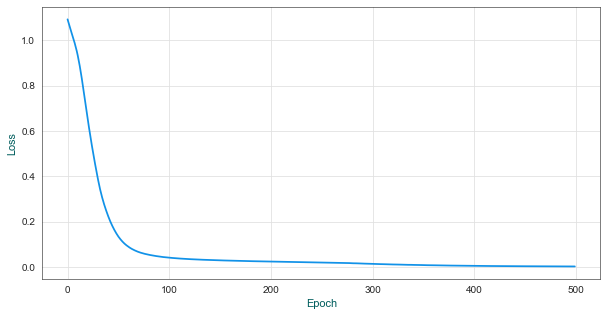

In [17]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), losses, color="#1192E8")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_pred = model(X_test)

# Evaluate the Algorithm
print("Gaussian Kernel - Confusion Matrix")
print(confusion_matrix(y_test, torch.max(y_test_pred.data, 1)[1]))
print("Gaussian Kernel - Classification Report")
print(classification_report(y_test, torch.max(y_test_pred.data, 1)[1]))

Gaussian Kernel - Confusion Matrix
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Gaussian Kernel - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## References

1. <a id='Vasilev2019'></a>Ivan Vasilev. *Advanced Deep Learning with Python.* Birmingham, UK: Packt, 2019.

2. <a id='Jones2017'></a>M. Tim Jones. “A Neural Networks Deep Dive.” *IBM Developer*. July 24, 2017. https://developer.ibm.com/articles/cc-cognitive-neural-networks-deep-dive/.

3. <a id='Madhavan2017'></a>Samaya Madhavan and M. Tim Jones. “Deep Learning Architectures: The Rise of Artificial Intelligence.” *IBM Developer*. Last updated January 25, 2021. https://developer.ibm.com/articles/cc-machine-learning-deep-learning-architectures/.

4. <a id='Kienzler2017'></a>Romeo Kienzler, “Introducing Deep Learning and Long-Short Term Memory Networks.” *IBM Developer*. https://developer.ibm.com/tutorials/iot-deep-learning-anomaly-detection-1/#long-short-term-memory-networks.

5. <a id='Kochenderfer2019'></a>Mykel J. Kochenderfer and Tim A. Wheeler. *Algorithms for Optimization*. Cambridge, MA: The MIT Press, 2019. https://algorithmsbook.com/optimization/.

6. <a id='Cybenko1989'></a>G. Cybenko. “Approximation by Superpositions of a Sigmoidal Function.” *Mathematics of Control, Signals and Systems*, vol. 2 (1989): 303–314. https://link.springer.com/article/10.1007/BF02551274.

7. <a id='Hornik1991'></a>Kurt Hornik. “Approximation Capabilities of Multilayer Feedforward Networks.” *Neural Networks*, vol. 4, no. 2 (1991): 251–257. https://www.sciencedirect.com/science/article/abs/pii/089360809190009T.

8. <a id='Nielsen2019'></a>Michael Nielsen. *Neural Networks and Deep Learning.* http://neuralnetworksanddeeplearning.com.


<!-- 1. [Continuous-variable quantum neural networks](https://arxiv.org/abs/1806.06871)
2. [Hands-On Machine Learning with Scikit-Learn and TensorFlow]()
3. [Learning Deep Learning: Theory and Practice of Neural Networks, Computer Vision, NLP, and Transformers using TensorFlow](https://learning.oreilly.com/library/view/learning-deep-learning/9780137470198/)
6. IBM Cloud education, Convolutional neural-networks [Convolutional neural-networks 2020](https://www.ibm.com/cloud/learn/convolutional-neural-networks)
8. IBM Cloud Education, Recurrent Neural Networks [Recurrent Neural Networks 2020](https://www.ibm.com/cloud/learn/recurrent-neural-networks)
 -->

<span style="font-size:10pt; font-weight:bold;"> &copy; Copyright IBM Corp. 2023 <br/>This content is categorized as an “existing” IBM asset as part of the IBM Quantum Accelerator contract. </span>